In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pre

In [2]:
df = pd.read_csv("RRCA_baseflow.csv")

In [3]:
df.head()

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [4]:
df[df['Irrigation_pumping'] >= 0.0001] 

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed


In [316]:
df.shape

(15591, 12)

In [5]:
dfNum = df.to_numpy()

In [6]:
dfNum

array([[7.1073200e+05, 1.4400000e+02, 1.0861900e+06, ..., 1.8990000e+01,
        0.0000000e+00, 1.4516100e-01],
       [7.1076300e+05, 1.4400000e+02, 1.0861900e+06, ..., 2.9630000e+01,
        0.0000000e+00, 4.4516100e-01],
       [7.1079100e+05, 1.4400000e+02, 1.0861900e+06, ..., 2.9630000e+01,
        0.0000000e+00, 1.3322030e+00],
       ...,
       [7.2187100e+05, 9.8000000e+01, 7.2187000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.2295082e-01],
       [7.2190200e+05, 9.8000000e+01, 7.2187000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.2000000e-01],
       [7.2193300e+05, 9.8000000e+01, 7.2187000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.2000000e-01]])

In [7]:
df['Segment_id'].unique()

array([144, 154, 176, 171, 152,  55, 118,  65,  64,  63,  40, 135,  53,
       123, 157, 147, 170, 136, 149,  60, 188, 194, 239, 256, 205,  59,
       148, 138,  62,  96, 178, 186, 159, 130,  97,  51, 145, 196, 146,
       189,  56,  98])

In [8]:
len(df['Segment_id'].unique())

42

In [9]:
df144 = df[df['Segment_id']== 144]

In [10]:
df144

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,710732,144,1086190,14476800,0.59,18.99,0.0000,0.145161
1,710763,144,1086190,14476800,0.97,29.63,0.0000,0.445161
2,710791,144,1086190,14476800,1.34,29.63,0.0000,1.332203
3,710822,144,1086190,14476800,1.79,29.63,0.0000,2.932203
4,710852,144,1086190,14476800,8.23,29.63,0.0000,3.728689
...,...,...,...,...,...,...,...,...
113,730486,144,1086190,14476800,0.83,15.65,0.0000,0.593548
114,730515,144,1086190,14476800,0.43,15.65,0.0000,1.476667
115,730546,144,1086190,14476800,0.86,15.65,0.0000,2.926667
116,730576,144,1086190,14476800,3.94,15.65,0.0000,2.820492


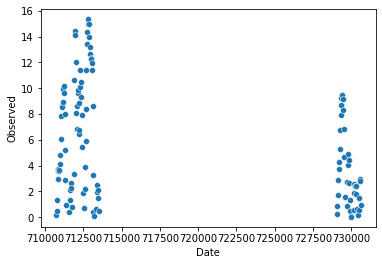

In [11]:
myplot = sns.scatterplot(data=df144, x='Date', y='Observed')

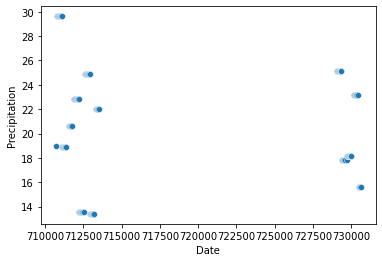

In [12]:
myplot = sns.scatterplot(data=df144, x='Date', y='Precipitation')

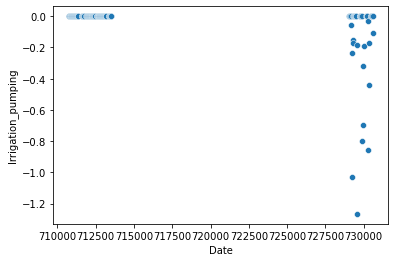

In [13]:
myplot = sns.scatterplot(data=df144, x='Date', y='Irrigation_pumping')

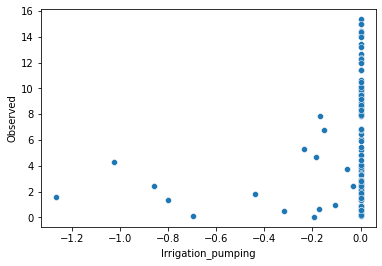

In [14]:
myplot = sns.scatterplot(data=df144, x='Irrigation_pumping', y='Observed')

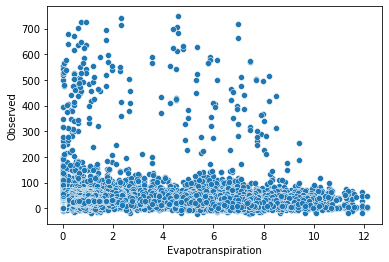

In [15]:
myplot = sns.scatterplot(data=df, x='Evapotranspiration', y='Observed')

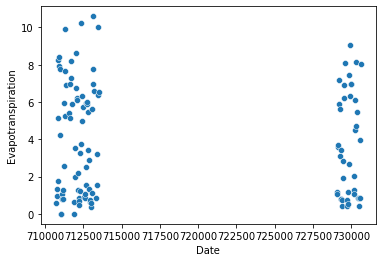

In [16]:
myplot = sns.scatterplot(data=df144, x='Date', y='Evapotranspiration')

In [17]:
df144.iloc[50]

Date                  7.126170e+05
Segment_id            1.440000e+02
x                     1.086190e+06
y                     1.447680e+07
Evapotranspiration    1.090000e+00
Precipitation         2.491000e+01
Irrigation_pumping    0.000000e+00
Observed              3.915254e+00
Name: 50, dtype: float64

In [18]:
df144['Date'].iloc[60]

712923

<AxesSubplot:xlabel='Date', ylabel='Count'>

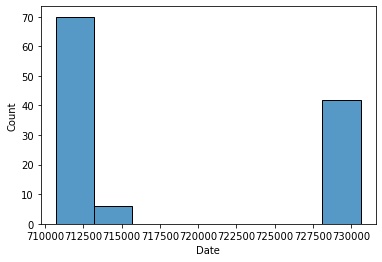

In [19]:
sns.histplot(data=df144, x='Date')

<AxesSubplot:xlabel='Date', ylabel='Count'>

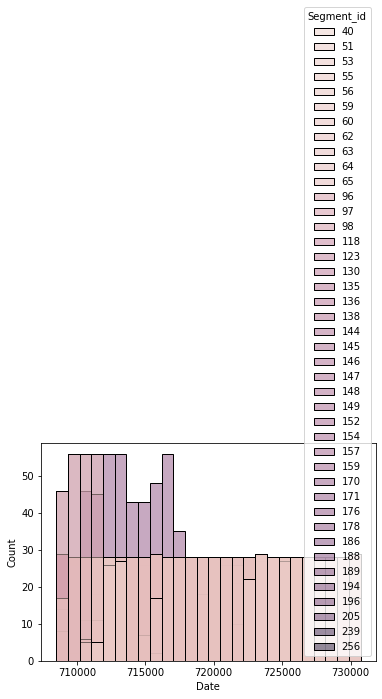

In [20]:
sns.histplot(data=df, x='Date', hue='Segment_id')

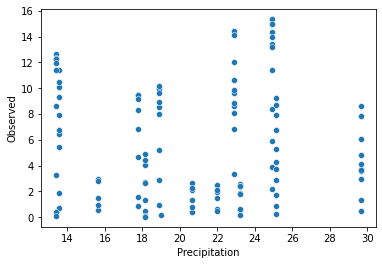

In [21]:
myplot = sns.scatterplot(data=df144, x='Precipitation', y='Observed')

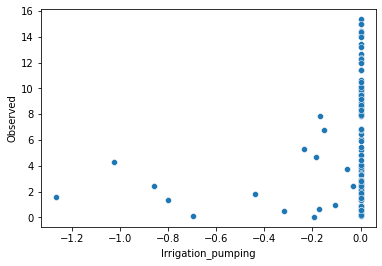

In [22]:
myplot = sns.scatterplot(data=df144, x='Irrigation_pumping', y='Observed')

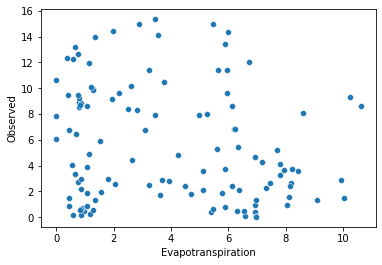

In [23]:
myplot = sns.scatterplot(data=df144, x='Evapotranspiration', y='Observed')

In [24]:
df144['InOut'] = df144['Precipitation'] - df144['Evapotranspiration'] + df144['Irrigation_pumping']

<ipython-input-24-761334e15732>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df144['InOut'] = df144['Precipitation'] - df144['Evapotranspiration'] + df144['Irrigation_pumping']


In [25]:
df['InOut'] = df['Precipitation'] - df['Evapotranspiration'] + df['Irrigation_pumping']

In [26]:
df

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,InOut
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,18.40
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,28.66
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,28.29
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,27.84
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,21.40
...,...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500,0.00
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475,0.00
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951,0.00
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000,0.00


In [27]:
df154 = df[df['Segment_id']== 154]

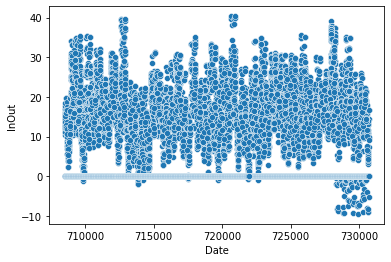

In [28]:
myplot = sns.scatterplot(data=df, x='Date', y='InOut')

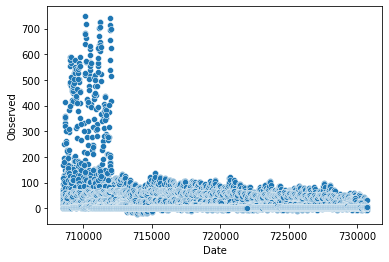

In [29]:
myplot = sns.scatterplot(data=df, x='Date', y='Observed')

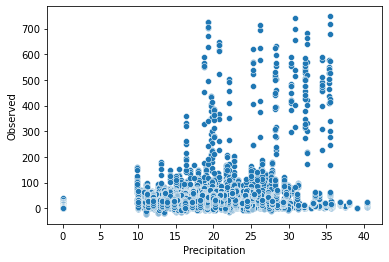

In [30]:
myplot = sns.scatterplot(data=df, x='Precipitation', y='Observed')

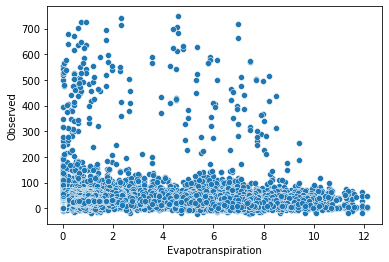

In [31]:
myplot = sns.scatterplot(data=df, x='Evapotranspiration', y='Observed')

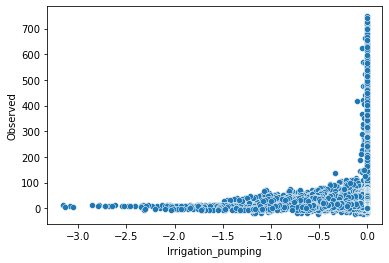

In [32]:
myplot = sns.scatterplot(data=df, x='Irrigation_pumping', y='Observed')

In [33]:
y = df154['Observed']
X = pd.DataFrame(data = df154, columns = ['Precipitation', 'Evapotranspiration', 'Irrigation_pumping'])

In [34]:
X

,Precipitation,Evapotranspiration,Irrigation_pumping
118,24.35,1.68,-0.035917
119,24.35,1.04,-0.009763
120,24.35,0.67,-0.009763
121,19.86,0.28,-0.009763
122,19.86,1.22,-0.009763
123,19.86,1.31,-0.009763
124,19.86,5.53,-0.009763
125,19.86,7.81,-0.009763
126,19.86,10.67,-0.450710
127,19.86,8.88,-0.593020


In [35]:
reg = LinearRegression().fit(X, y)

In [36]:
reg.score(X,y)

0.20636747108736353

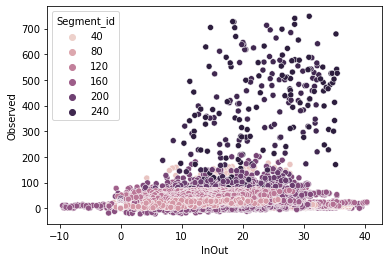

In [37]:
myplot = sns.scatterplot(data=df, x='InOut', y='Observed', hue='Segment_id')

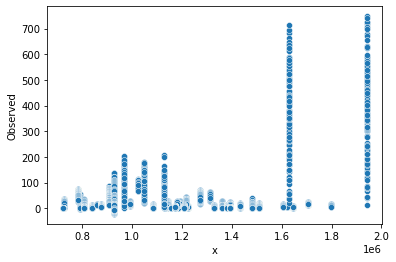

In [38]:
myplot = sns.scatterplot(data=df, x='x', y='Observed')

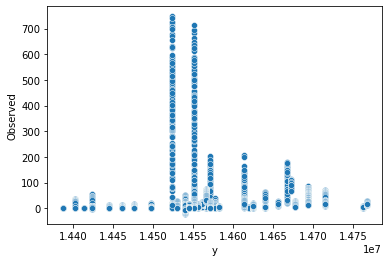

In [39]:
myplot = sns.scatterplot(data=df, x='y', y='Observed')

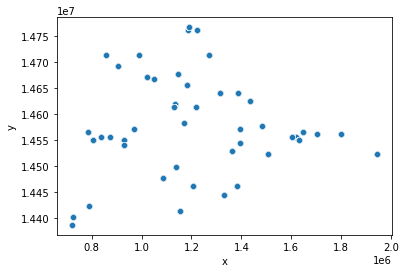

In [40]:
myplot = sns.scatterplot(x=df['x'], y=df['y'])

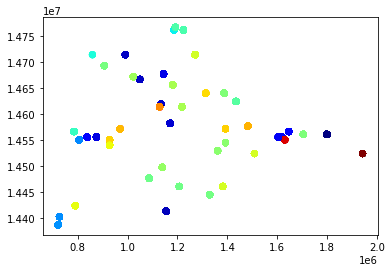

In [41]:
plt.scatter(df['x'],df['y'], c=df['Segment_id'], cmap='jet')

In [42]:
#plt.scatter(df['x'],df['y'], c=df[], cmap='jet')

In [43]:
mycolors = (df['Observed']-min(df['Observed']))/max(df['Observed'])

In [44]:
max(df['Observed'])

747.80328

In [45]:
min(df['Observed']+22)

0.0

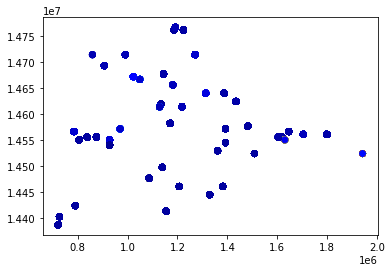

In [46]:
plt.scatter(df['x'],df['y'], c=mycolors, cmap='jet')

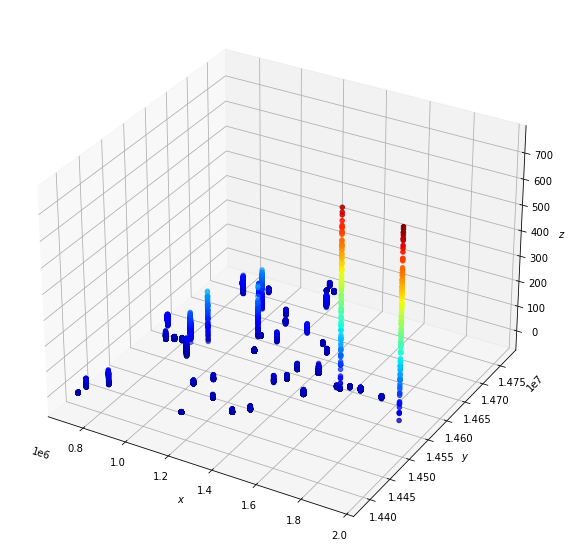

In [47]:
# Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['x'],df['y'],df['Observed'],c=df['Observed'],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

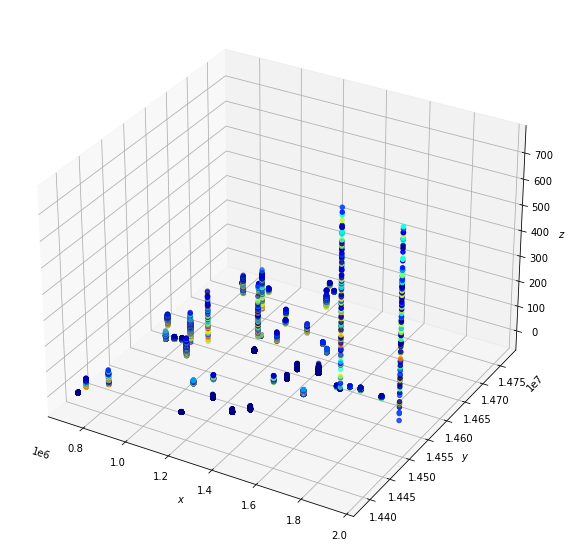

In [131]:
# Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['x'],df['y'],df['Observed'],c=df['Evapotranspiration'],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

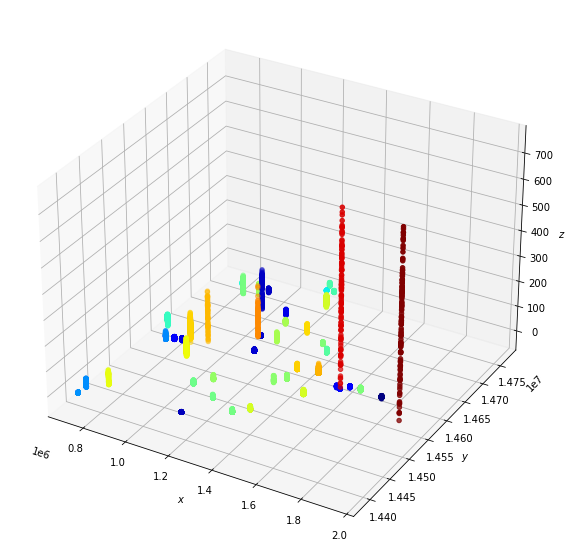

In [49]:
# Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['x'],df['y'],df['Observed'],c=df['Segment_id'],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

In [73]:
df256 = df[df['Segment_id']==256]

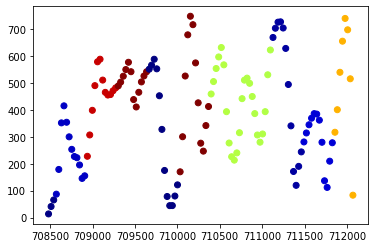

In [75]:
plt.scatter(df256['Date'],df256['Observed'], c=df256['Precipitation'], cmap='jet')

In [99]:
df256.iloc[55]

Date                  7.101530e+05
Segment_id            2.560000e+02
x                     1.941550e+06
y                     1.452432e+07
Evapotranspiration    4.600000e+00
Precipitation         3.550000e+01
Irrigation_pumping    0.000000e+00
Observed              7.478033e+02
InOut                 3.090000e+01
Name: 6565, dtype: float64

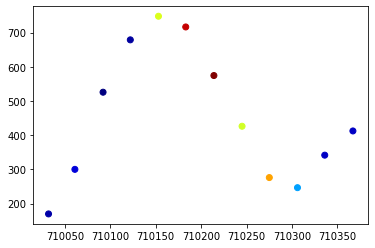

In [129]:
temp = df256[df256['Precipitation']==35.5] #or 18.78
plt.scatter(temp['Date'],temp['Observed'],c=(temp['Evapotranspiration']),cmap='jet')

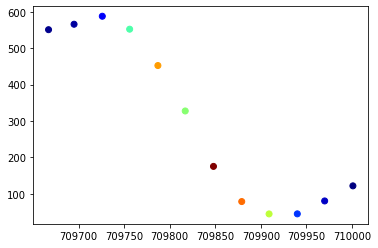

In [130]:
temp = df256[df256['Precipitation']==18.78] #or 18.78
plt.scatter(temp['Date'],temp['Observed'],c=(temp['Evapotranspiration']),cmap='jet')

In [85]:
df['Segment_id'].unique()

array([144, 154, 176, 171, 152,  55, 118,  65,  64,  63,  40, 135,  53,
       123, 157, 147, 170, 136, 149,  60, 188, 194, 239, 256, 205,  59,
       148, 138,  62,  96, 178, 186, 159, 130,  97,  51, 145, 196, 146,
       189,  56,  98])

In [86]:
def myplot(n):
    dfn = df[df['Segment_id']==n]
    plt.scatter(dfn['Date'],dfn['Observed'], c=dfn['Precipitation'], cmap='jet')
    plt.show()

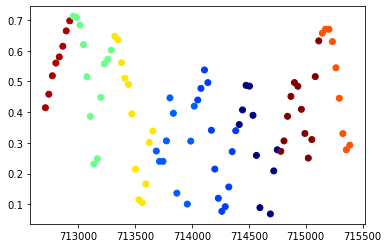

In [93]:
myplot(118)

In [183]:
mot1 = df[df['Segment_id']==256]
mot2 = mot1[mot1['Date'] % 365 < 180]
mot3 = mot1[mot1['Date'] % 365 > 180]

In [187]:
df['intDiv'] = df['Date'] // 365
df['remainder'] = df['Date'] % 365

In [188]:
df

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,InOut,mything,intDiv,remainder
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,18.40,9893.71,1947,77
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,28.66,16296.00,1947,108
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,28.29,22549.52,1947,136
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,27.84,30177.61,1947,167
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,21.40,138996.47,1947,197
...,...,...,...,...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500,0.00,0.00,1977,205
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475,0.00,0.00,1977,236
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951,0.00,0.00,1977,266
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000,0.00,0.00,1977,297


In [189]:
df256b = df[df['Segment_id']==256]

In [191]:
df256c = df256b.groupby('intDiv').agg({'remainder':'sum'})

In [192]:
df256c

,remainder
intDiv,
1941,2176
1942,2180
1943,2180
1944,2180
1945,2188
1946,2192
1947,2192
1948,2192
1949,2200


In [313]:
def myPredict(ID, threshold):
    m1 = df[df['Segment_id']==ID]
    years = m1['intDiv'].unique()
    ydfs = [m1[m1['intDiv']==year] for year in years]
    
    def splitYear(df,th):
        n1 = df[df['remainder'] < th]
        n2 = df[df['remainder'] >= th]
        return [n1, n2]
    
    Ydfs = []#splitYear(ydfs[0]) #[splitYear(df) for df in ydfs]
    for i in range(len(ydfs)):
        Ydfs += splitYear(ydfs[i], threshold)
        
    def learnLin(df):
        X = (df['Date']).to_numpy().reshape(-1,1)
        y = df['Observed']
        reg = LinearRegression().fit(X, y)
        return [reg.score(X,y), reg.coef_, reg.intercept_]
    
    mylist = []
    mycoefs = []
    myintercepts = []
    for thing in Ydfs:
        mylist += [learnLin(thing)[0]]
        mycoefs += [learnLin(thing)[1]]
        myintercepts += [learnLin(thing)[2]]
        
    #bestOne = np.argmin(mylist)
    plt.figure(figsize = (10,10))
    myfig = plt.scatter(m1['Date'], m1['Observed'])
    for ind in range(len(Ydfs)):
        plt.plot(Ydfs[ind]['Date'], mycoefs[ind]*Ydfs[ind]['Date']+myintercepts[ind], c='red')
    plt.show()
    fig = myfig.get_figure()
    fig.savefig("file.png")
    
    return sum(mylist)/len(mylist)

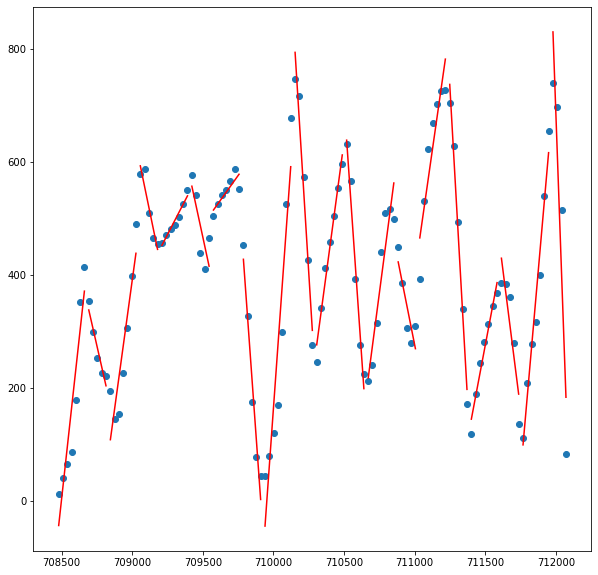

0.8836699025965338

In [314]:
myPredict(256,200)

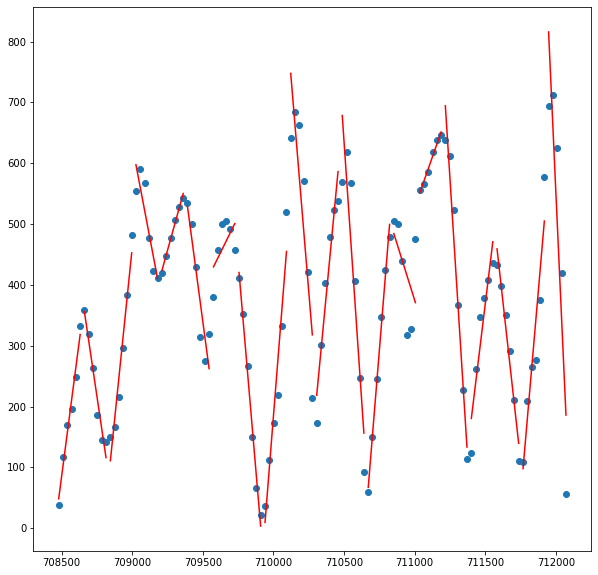

0.8556293193324256

In [315]:
myPredict(239,180)

In [266]:
df['Segment_id'].unique()

array([144, 154, 176, 171, 152,  55, 118,  65,  64,  63,  40, 135,  53,
       123, 157, 147, 170, 136, 149,  60, 188, 194, 239, 256, 205,  59,
       148, 138,  62,  96, 178, 186, 159, 130,  97,  51, 145, 196, 146,
       189,  56,  98])

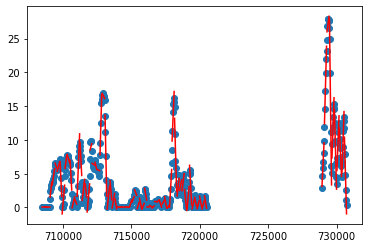

0.7976607511738083

In [269]:
#for ID in df['Segment_id'].unique():
 #   myPredict(ID)
    
myPredict(152)

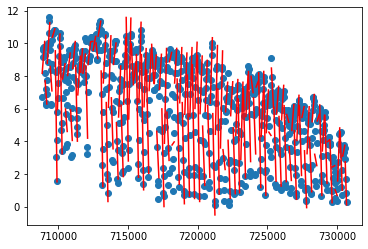

0.6126972629073237

In [272]:
myPredict(65)

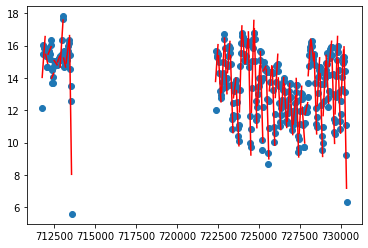

0.7688938472190257

In [275]:
myPredict(40)

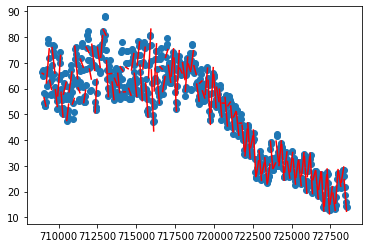

0.5756675862870393

In [280]:
myPredict(147)

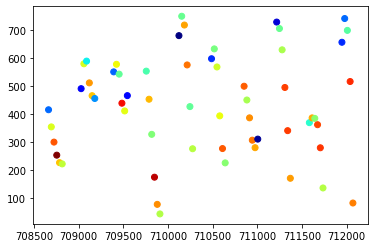

In [185]:
plt.scatter(mot3['Date'],mot3['Observed'], c=mot3['Evapotranspiration'], cmap='jet')

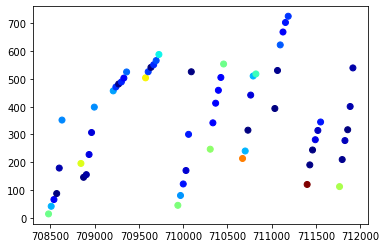

In [186]:
plt.scatter(mot2['Date'],mot2['Observed'], c=mot2['Evapotranspiration'], cmap='jet')

In [171]:
def myplot2(n):
    dfn = df[df['Segment_id']==n]
    plt.scatter(dfn['Date'],dfn['Observed'], c=dfn['Evapotranspiration'], cmap='jet')
    plt.show()
    
def myplot3(n):
    dfn = df[df['Segment_id']==n]
    plt.scatter(dfn['Date'],dfn['Evapotranspiration'], c=dfn['Irrigation_pumping'], cmap='jet')
    plt.show()
    
def myplot4(n):
    dfn = df[df['Segment_id']==n]
    plt.plot(dfn['Date'],dfn['Observed'], c='red')
    plt.plot(dfn['Date'],90*dfn['Evapotranspiration'], c='blue')
    plt.show()
    
def myplot5(n):
    dfn = df[df['Segment_id']==n]
    plt.scatter(80*dfn['Evapotranspiration'], dfn['Observed'], c='blue')
    plt.show()

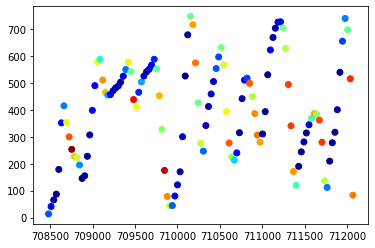

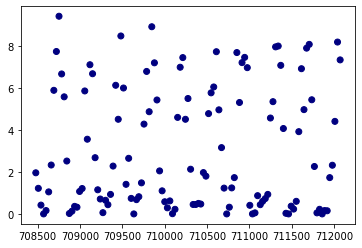

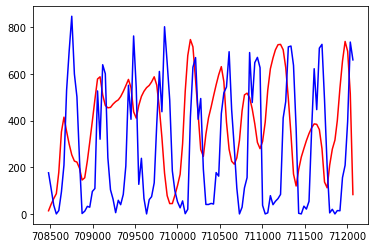

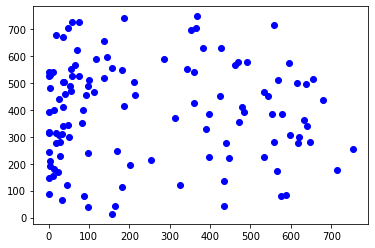

In [172]:
myplot2(256)
myplot3(256)
myplot4(256)
myplot5(256)

In [158]:
max(df[df['Segment_id']==256]['Precipitation'])

35.5

In [159]:
min(df[df['Segment_id']==256]['Precipitation'])

18.78

In [160]:
max(df[df['Segment_id']==118]['Precipitation'])

24.29

In [161]:
max(df[df['Segment_id']==118]['Precipitation'])

24.29

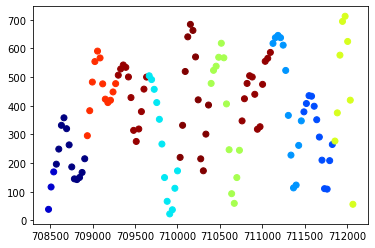

In [77]:
df239 = df[df['Segment_id']==239]
plt.scatter(df239['Date'],df239['Observed'], c=df239['Precipitation'], cmap='jet')

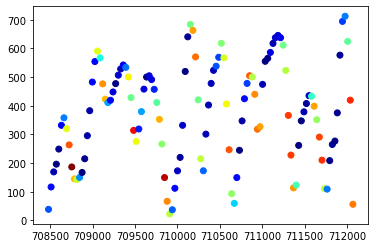

In [83]:
plt.scatter(df239['Date'],df239['Observed'], c=df239['Evapotranspiration'], cmap='jet')

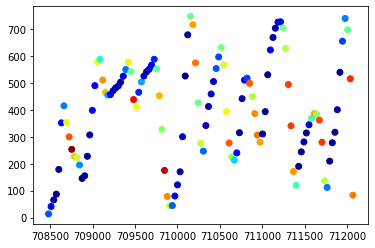

In [101]:
plt.scatter(df256['Date'],df256['Observed'], c=df256['Evapotranspiration'], cmap='jet')

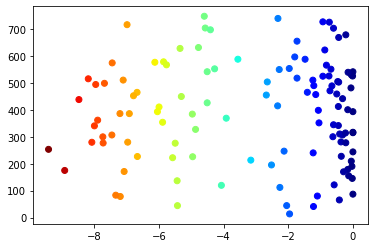

In [145]:
plt.scatter((-1)*df256['Evapotranspiration'],df256['Observed'], c=df256['Evapotranspiration'], cmap='jet')

In [102]:
min(df256['Evapotranspiration'])

0.0

In [103]:
max(df256['Evapotranspiration'])

9.42

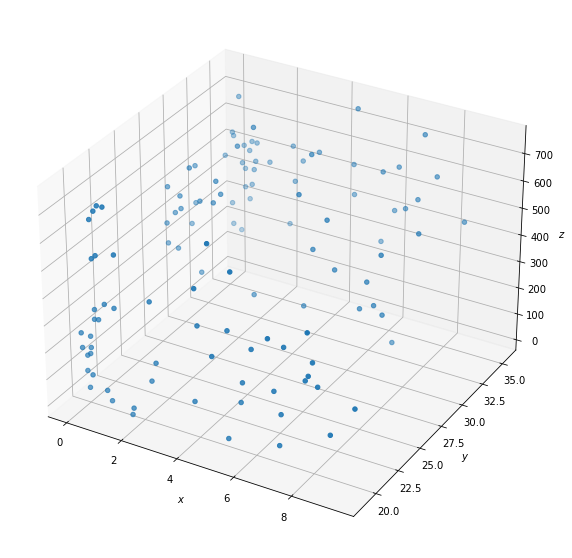

In [106]:
# Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df256['Evapotranspiration'],df256['Precipitation'],df256['Observed'])#,c=df256['Date'],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

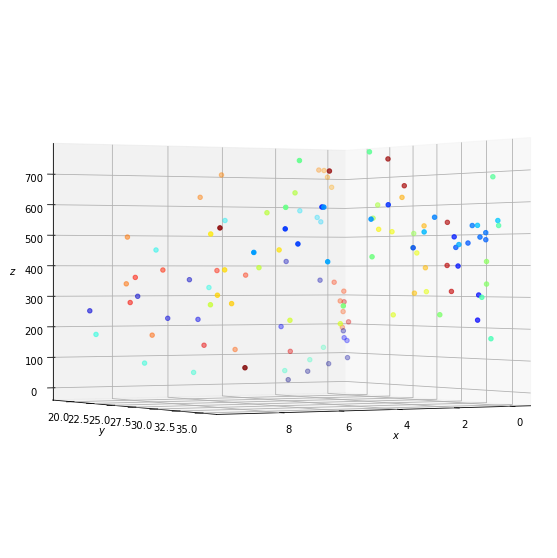

In [109]:
# Plot the dataset.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df256['Evapotranspiration'],df256['Precipitation'],df256['Observed'],c=df256['Date'],cmap="jet")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.view_init(0, 60)
#ax.view_init(-140, 60)
plt.show()

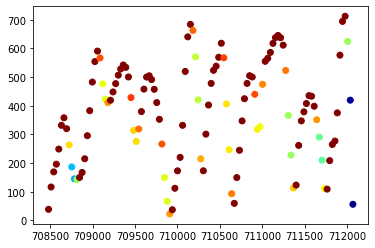

In [84]:
plt.scatter(df239['Date'],df239['Observed'], c=df239['Irrigation_pumping'], cmap='jet')

In [66]:
dfMax = df.groupby('Segment_id').agg({'Observed':'max', 'x':'first', 'y':'first', 
                                     'Precipitation':'mean','Evapotranspiration':'mean','Irrigation_pumping':'mean'})

dfX = pd.DataFrame(data = dfMax, columns = ['y','Precipitation','Evapotranspiration', 'Irrigation_pumping'])

In [81]:
dfTest = df[df['Segment_id']==256].groupby('Precipitation').apply(lambda x: x)

In [82]:
dfTest

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,InOut
6510,708479,256,1941550,14524320,1.96,18.90,0.0,13.524590,16.94
6511,708509,256,1941550,14524320,1.22,18.90,0.0,41.024590,17.68
6512,708540,256,1941550,14524320,0.42,18.90,0.0,65.403230,18.48
6513,708571,256,1941550,14524320,0.00,19.80,0.0,86.903230,19.80
6514,708600,256,1941550,14524320,0.16,19.80,0.0,178.733330,19.64
...,...,...,...,...,...,...,...,...,...
6624,711948,256,1941550,14524320,1.73,30.85,0.0,655.172131,29.12
6625,711979,256,1941550,14524320,2.32,30.85,0.0,739.672130,28.53
6626,712009,256,1941550,14524320,4.41,30.85,0.0,697.475410,26.44
6627,712040,256,1941550,14524320,8.19,30.85,0.0,515.475410,22.66


In [67]:
myscaler = pre.StandardScaler()

In [68]:
myscaler.fit(dfX)
df2Max = myscaler.transform(dfX)

In [69]:
df2Max

array([[-0.17835483,  1.1547589 ,  0.13945181, -0.6258387 ],
       [-1.7320236 , -1.99133899, -2.00582894,  0.8169632 ],
       [ 0.93140857,  0.41446919,  0.54095867,  0.09943972],
       [ 0.43201504,  0.47440084,  0.58923514, -1.40510056],
       [ 0.04359785, -1.99133899, -2.00582894,  0.8169632 ],
       [-0.233843  ,  0.15843754,  0.54227144, -3.73162221],
       [ 1.04238491,  0.53335333,  0.50468606,  0.02901331],
       [-0.233843  ,  0.70622003,  0.2534968 ,  0.75109425],
       [-0.233843  ,  0.51323919,  0.2896844 ,  0.66356186],
       [-0.12286666,  0.94579108,  0.22297294, -0.20172288],
       [-0.233843  ,  0.10379388,  0.67710246, -0.86473802],
       [-0.28933117,  0.09109431,  0.73313127,  0.17017805],
       [-1.84299994, -0.06186717,  0.77859997, -0.73866411],
       [-2.00946445, -1.99133899, -2.00582894,  0.8169632 ],
       [ 1.93019564,  0.15823385,  0.71639404,  0.63920297],
       [ 1.4308021 , -0.09810566, -0.79436397,  0.8169632 ],
       [-0.12286666,  0.

In [70]:
myY = dfMaxa\['Observed']
myX = df2Max

In [71]:
reg = LinearRegression().fit(X, y)

In [72]:
reg.score(X,y)

0.20636747108736353

In [110]:
df['Evapotranspiration']

0        0.59
1        0.97
2        1.34
3        1.79
4        8.23
         ... 
15586    0.00
15587    0.00
15588    0.00
15589    0.00
15590    0.00
Name: Evapotranspiration, Length: 15591, dtype: float64

In [146]:
df['mything'] = (df['Evapotranspiration'])*(df['Date']-693963)

In [147]:
df256a = df[df['Segment_id']==256]

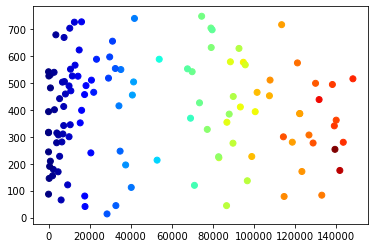

In [148]:
plt.scatter(df256a['mything'],df256a['Observed'], c=df256a['Evapotranspiration'], cmap='jet')

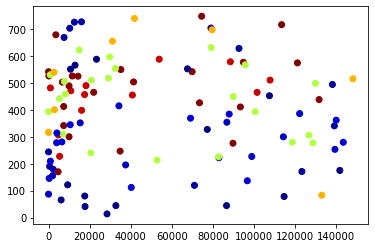

In [149]:
plt.scatter(df256a['mything'],df256a['Observed'], c=df256a['Precipitation'], cmap='jet')

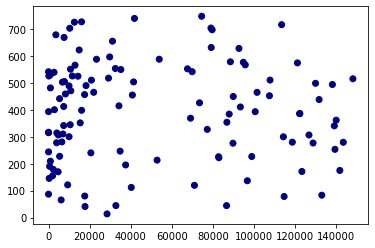

In [150]:
plt.scatter(df256a['mything'],df256a['Observed'], c=df256a['Irrigation_pumping'], cmap='jet')